# Capstone Final Project

## Import Libraries

In [1]:
%matplotlib notebook
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Import Dataset found here: https://gist.github.com/leonardobareno/ba093f8d2ba5e67a9fc4d17bad860d66"

In [2]:
data = pd.read_json('C:\\Users\\David\\Desktop\\IBM\\Capstone\\colegios.json')

In [3]:
with open('colegios.json') as json_data:
    bogota_data = json.load(json_data)

In [4]:
bogota_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-74.05866667, 4.748233333]},
   'properties': {'title': '(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL',
    'id': 'C001'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-74.092625, 4.571530556]},
   'properties': {'title': '(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO',
    'id': 'C002'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-74.182075, 4.605258333]},
   'properties': {'title': '(C003) NUEVO LIC GRANADINO', 'id': 'C003'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-74.15299722, 4.623572222]},
   'properties': {'title': '(C004) COL BRITANICO SEDE KENNEDY', 'id': 'C004'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-74.18471667, 4.598536111]},
   'properties': {'title': '(C005) CENT EDUC WILFREDO LEHNER', 'id': 'C005'}},
  {'type': 'Feature',
   'geometry': 

## Extract the features into another dataset

In [5]:
neighborhoods_data = bogota_data['features']

In [6]:
# define the dataframe columns
column_names = ['Title', 'id', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    neighborhood_name = data['properties']['title']
    neighborhood_id = data['properties']['id']    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0]
    neighborhood_lon = neighborhood_latlon[1]
    
    neighborhood = neighborhood.append({'Title': neighborhood_name,
                                          'id':neighborhood_id ,
                                          'Latitude': neighborhood_lon,
                                          'Longitude': neighborhood_lat}, ignore_index=True)

In [9]:
neighborhood.head()

,Title,id,Latitude,Longitude
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,C001,4.748233,-74.058667
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,C002,4.571531,-74.092625
2,(C003) NUEVO LIC GRANADINO,C003,4.605258,-74.182075
3,(C004) COL BRITANICO SEDE KENNEDY,C004,4.623572,-74.152997
4,(C005) CENT EDUC WILFREDO LEHNER,C005,4.598536,-74.184717


In [11]:
print('The dataframe has {} ids .'.format(
        len(neighborhood['id'].unique()),
        neighborhood.shape[0]
    )
)

The dataframe has 200 ids .


## Limit Dataset to 100 Schools

In [12]:
df = neighborhood.head(100)

In [13]:
df.shape

(100, 4)

## Data Cleansing - Locating Null Values

In [14]:
missing_data = df.isnull()
missing_data.head(5)

,Title,id,Latitude,Longitude
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Title
False    100
Name: Title, dtype: int64

id
False    100
Name: id, dtype: int64

Latitude
False    100
Name: Latitude, dtype: int64

Longitude
False    100
Name: Longitude, dtype: int64



## Search for the coordinates of Bogota D.C

In [16]:
address = 'Bogota, CO'

geolocator = Nominatim(user_agent="bo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota City are 4.59808, -74.0760439.


In [17]:
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, id, title in zip(df['Latitude'], df['Longitude'], df['id'], df['Title']):
    label = '{}, {}'.format(title, id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota) 

## Add markets of the schools to the map

In [91]:
map_bogota

## Load Foursquare credentials

In [19]:
CLIENT_ID = 'ITAKD2F1QR5R1ATL5OUFDSZQLV5RDZ5SGW32KWKR3D5ZS4BQ' # your Foursquare ID
CLIENT_SECRET = 'J2B1PEJVSY5SA00LPM4MELOLTHECMYXQAS1LITXL3FIMR22T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ITAKD2F1QR5R1ATL5OUFDSZQLV5RDZ5SGW32KWKR3D5ZS4BQ
CLIENT_SECRET:J2B1PEJVSY5SA00LPM4MELOLTHECMYXQAS1LITXL3FIMR22T


In [21]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

 # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of (C200) CENT EDUC DIST MANUEL ELKIN PATARROYO are 4.748233333, -74.05866667.


In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ITAKD2F1QR5R1ATL5OUFDSZQLV5RDZ5SGW32KWKR3D5ZS4BQ&client_secret=J2B1PEJVSY5SA00LPM4MELOLTHECMYXQAS1LITXL3FIMR22T&v=20180605&ll=4.59808,-74.0760439&radius=500&limit=100'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e78eb79c8cff2001b7b7d6b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Plaza de Bolívar',
  'headerFullLocation': 'Plaza de Bolívar, Bogotá',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 4.6025800045000045,
    'lng': -74.07153779491875},
   'sw': {'lat': 4.593579995499996, 'lng': -74.08055000508125}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bba485b53649c74d4d948fb',
       'name': 'Centro Cultural Gabriel García Márquez',
       'location': {'address': 'Calle 11 #5-60',
        'lat': 4.597693839626869,
        'lng': -74.07428510390115,
        'labeledLatLngs': [{'label

## Define function to retrieve results

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Centro Cultural Gabriel García Márquez,Cultural Center,4.597694,-74.074285
1,La Puerta de la Catedral,Latin American Restaurant,4.597848,-74.074611
2,La Puerta Falsa,Café,4.597977,-74.074878
3,Teatro Colón,Theater,4.596540,-74.074538
4,Juan Valdez Café,Coffee Shop,4.597782,-74.074299


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Repeat the process with each school

In [ ]:
bogotaVenues = getNearbyVenues(names=df['Title'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [28]:
print(bogotaVenues.shape)
bogotaVenues.head()

(969, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,4.748233,-74.058667,Leonardelos,4.750154,-74.061461,Pizza Place
1,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,4.748233,-74.058667,La Gallina Tropical,4.745729,-74.056596,Restaurant
2,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,4.748233,-74.058667,Tiendas D1,4.749758,-74.059247,Convenience Store
3,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,4.748233,-74.058667,Surtifruver,4.749473,-74.057417,Fruit & Vegetable Store
4,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,4.748233,-74.058667,Juan Valdez Unicentro,4.744055,-74.059476,Breakfast Spot


## Search for missing data


In [29]:
missing_data = bogotaVenues.isnull()
missing_data.head(5)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [30]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Neighborhood
False    969
Name: Neighborhood, dtype: int64

Neighborhood Latitude
False    969
Name: Neighborhood Latitude, dtype: int64

Neighborhood Longitude
False    969
Name: Neighborhood Longitude, dtype: int64

Venue
False    969
Name: Venue, dtype: int64

Venue Latitude
False    969
Name: Venue Latitude, dtype: int64

Venue Longitude
False    969
Name: Venue Longitude, dtype: int64

Venue Category
False    969
Name: Venue Category, dtype: int64



## Group by school ('Neighborhod')

In [31]:
bogotaVenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,8,8,8,8,8,8
(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,4,4,4,4,4,4
(C003) NUEVO LIC GRANADINO,4,4,4,4,4,4
(C004) COL BRITANICO SEDE KENNEDY,7,7,7,7,7,7
(C005) CENT EDUC WILFREDO LEHNER,2,2,2,2,2,2
(C006) COL COLOMBO JAPONES,3,3,3,3,3,3
(C007) COL INST INSCAP SEDE FERIAS,14,14,14,14,14,14
(C008) CENT PANAMERICANO DE CAPACITACION SEDE RESTREPO,14,14,14,14,14,14
(C009) COL CIUDAD PATIO BONITO,2,2,2,2,2,2


## Analize each school

In [32]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogotaVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogotaVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Women's Store,ATM,Adult Boutique,Advertising Agency,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Laundromat,Library,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Notary,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Real Estate Office,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Repair,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,University,Vegetarian / Vegan Restaurant,Warehouse Store,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [33]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Women's Store,ATM,Adult Boutique,Advertising Agency,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Laundromat,Library,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Nightlife Spot,Notary,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Real Estate Office,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Repair,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,University,Vegetarian / Vegan Restaurant,Warehouse Store,Wings Joint
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.125000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [34]:
bogota_grouped.shape

(96, 169)

## Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in bogota_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL----
                  venue  freq
0            Restaurant  0.12
1     Convenience Store  0.12
2        Breakfast Spot  0.12
3  Fast Food Restaurant  0.12
4            Food Truck  0.12


----(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO----
           venue  freq
0           Park  0.25
1  Shopping Mall  0.25
2            Bar  0.25
3      BBQ Joint  0.25
4       Mountain  0.00


----(C003) NUEVO LIC GRANADINO----
                venue  freq
0       Movie Theater  0.25
1       Shopping Mall  0.25
2  Mexican Restaurant  0.25
3          Restaurant  0.25
4            Mountain  0.00


----(C004) COL BRITANICO SEDE KENNEDY----
                       venue  freq
0                Pizza Place  0.29
1           Department Store  0.14
2                 Restaurant  0.14
3        Fried Chicken Joint  0.14
4  Latin American Restaurant  0.14


----(C005) CENT EDUC WILFREDO LEHNER----
                venue  freq
0  Mexican Restaurant   0.5
1         Aut

                  venue  freq
0  Fast Food Restaurant   0.5
1           Shoe Repair   0.5
2         Women's Store   0.0
3              Mountain   0.0
4           Men's Store   0.0


----(C058) INST COPESAL----
                      venue  freq
0                      Park  0.50
1              Soccer Field  0.25
2               Auto Garage  0.25
3  Mediterranean Restaurant  0.00
4               Men's Store  0.00


----(C059) COL ARIEL DAVID----
                venue  freq
0         Bus Station  0.67
1         Gas Station  0.33
2   Martial Arts Dojo  0.00
3         Men's Store  0.00
4  Mexican Restaurant  0.00


----(C060) INST SANTA MARIA DE LA CRUZ----
                   venue  freq
0               Pharmacy   0.4
1            Pizza Place   0.2
2  Check Cashing Service   0.2
3                 Buffet   0.2
4              Multiplex   0.0


----(C061) COL REAL DE COLOMBIA - SEDE PRINCIPAL----
                      venue  freq
0               Supermarket  0.25
1         Fish & Chips Shop  0.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,Fruit & Vegetable Store,Gym,Fast Food Restaurant,Breakfast Spot,Convenience Store,Pizza Place,Restaurant,Food Truck,Dance Studio,Diner
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,Park,Bar,BBQ Joint,Shopping Mall,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner
2,(C003) NUEVO LIC GRANADINO,Shopping Mall,Mexican Restaurant,Movie Theater,Restaurant,Dance Studio,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
3,(C004) COL BRITANICO SEDE KENNEDY,Pizza Place,Burger Joint,Fried Chicken Joint,Latin American Restaurant,Department Store,Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega
4,(C005) CENT EDUC WILFREDO LEHNER,Mexican Restaurant,Auto Garage,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store


In [95]:
colegios_venues_sorted = neighborhoods_venues_sorted.head(20)

## Visualization of first 20 schools

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

<IPython.core.display.Javascript object>


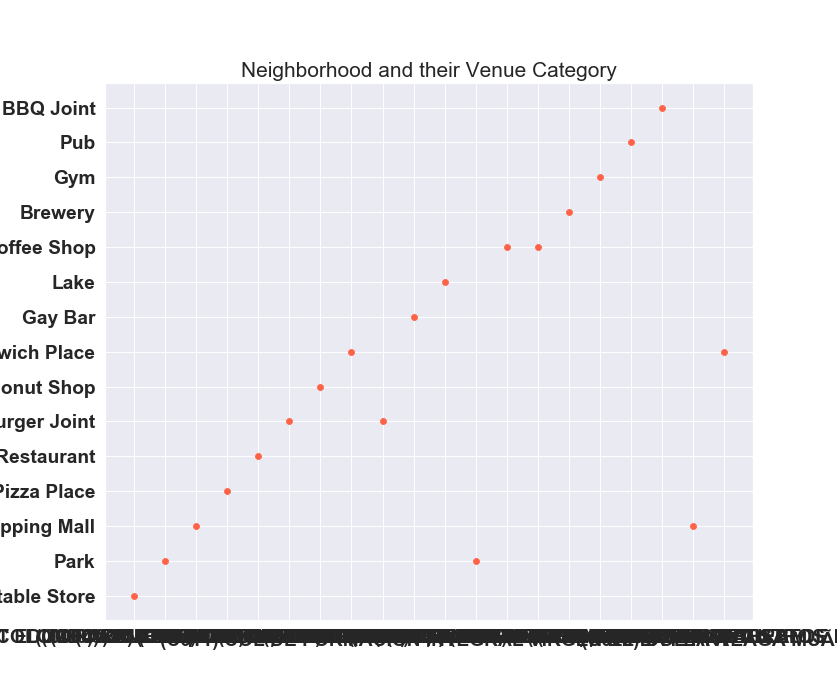

In [103]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10), dpi=100);
plt.scatter('Neighborhood','1st Most Common Venue',data=colegios_venues_sorted ,c='tomato')
plt.title('Neighborhood and their Venue Category');

<IPython.core.display.Javascript object>


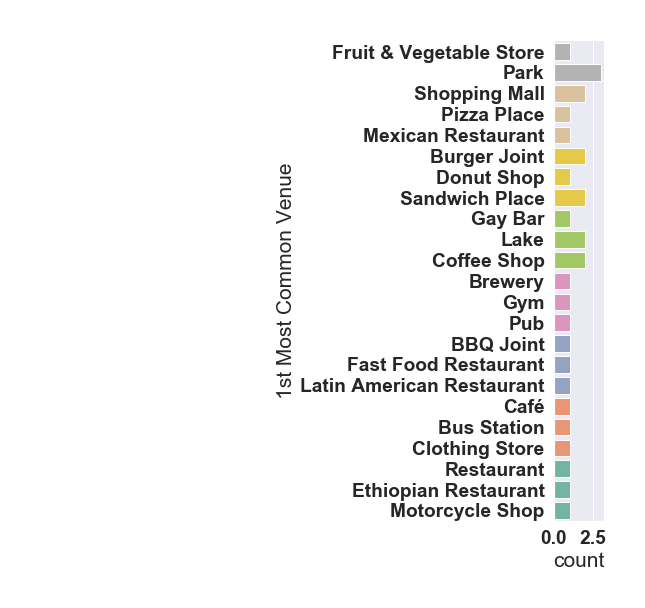

In [50]:
sns.set(font_scale=1.8)

sns.catplot(y="1st Most Common Venue", kind="count",palette="Set2_r", edgecolor="1",data=colegios_venues_sorted,);

## Assing clusters

In [51]:
# set number of clusters
kclusters = 5

bogota_grouped_clustering = bogota_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 0, 4, 1, 1, 4, 4, 4, 4])

In [52]:
newdf = df.rename(columns={'Title':'Neighborhood'})
newdf

,Neighborhood,id,Latitude,Longitude
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,C001,4.748233,-74.058667
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,C002,4.571531,-74.092625
2,(C003) NUEVO LIC GRANADINO,C003,4.605258,-74.182075
3,(C004) COL BRITANICO SEDE KENNEDY,C004,4.623572,-74.152997
4,(C005) CENT EDUC WILFREDO LEHNER,C005,4.598536,-74.184717
5,(C006) COL COLOMBO JAPONES,C006,4.600931,-74.167022
6,(C007) COL INST INSCAP SEDE FERIAS,C007,4.684353,-74.083844
7,(C008) CENT PANAMERICANO DE CAPACITACION SEDE ...,C008,4.582228,-74.103269
8,(C009) COL CIUDAD PATIO BONITO,C009,4.638092,-74.163753
9,(C010) EXTERN SIMON BOLIVAR,C010,4.646900,-74.067592


## Search for missing data

In [53]:
missing_data = neighborhoods_venues_sorted.isnull()
missing_data.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [54]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Neighborhood
False    96
Name: Neighborhood, dtype: int64

1st Most Common Venue
False    96
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
False    96
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
False    96
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
False    96
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
False    96
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
False    96
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
False    96
Name: 7th Most Common Venue, dtype: int64

8th Most Common Venue
False    96
Name: 8th Most Common Venue, dtype: int64

9th Most Common Venue
False    96
Name: 9th Most Common Venue, dtype: int64

10th Most Common Venue
False    96
Name: 10th Most Common Venue, dtype: int64



In [ ]:
newwdf =newdf.head(180)

In [60]:
bogotaMerged5= newdf

In [55]:
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)


In [61]:
bogotaMerged5 = bogotaMerged5.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [62]:
bogotaMerged5.shape

(100, 15)

In [63]:
missing_data = bogotaMerged5.isnull()
missing_data.head(5)

,Neighborhood,id,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Neighborhood
False    100
Name: Neighborhood, dtype: int64

id
False    100
Name: id, dtype: int64

Latitude
False    100
Name: Latitude, dtype: int64

Longitude
False    100
Name: Longitude, dtype: int64

Cluster Labels
False    96
True      4
Name: Cluster Labels, dtype: int64

1st Most Common Venue
False    96
True      4
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
False    96
True      4
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
False    96
True      4
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
False    96
True      4
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
False    96
True      4
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
False    96
True      4
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
False    96
True      4
Name: 7th Most Common Venue, dtype: int64

8th Most Common Venue
False    96
True      4
Name: 8th Most Common Venue, dtype: int64

9th Mos

In [66]:
newww = bogotaMerged5.dropna()

,Neighborhood,id,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,C001,4.748233,-74.058667,4.0,Fruit & Vegetable Store,Gym,Fast Food Restaurant,Breakfast Spot,Convenience Store,Pizza Place,Restaurant,Food Truck,Dance Studio,Diner
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,C002,4.571531,-74.092625,1.0,Park,Bar,BBQ Joint,Shopping Mall,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner
2,(C003) NUEVO LIC GRANADINO,C003,4.605258,-74.182075,0.0,Shopping Mall,Mexican Restaurant,Movie Theater,Restaurant,Dance Studio,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
3,(C004) COL BRITANICO SEDE KENNEDY,C004,4.623572,-74.152997,4.0,Pizza Place,Burger Joint,Fried Chicken Joint,Latin American Restaurant,Department Store,Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega
4,(C005) CENT EDUC WILFREDO LEHNER,C005,4.598536,-74.184717,1.0,Mexican Restaurant,Auto Garage,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
5,(C006) COL COLOMBO JAPONES,C006,4.600931,-74.167022,1.0,Burger Joint,BBQ Joint,Supermarket,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
6,(C007) COL INST INSCAP SEDE FERIAS,C007,4.684353,-74.083844,4.0,Donut Shop,Burger Joint,Shopping Mall,Creperie,Fast Food Restaurant,Soccer Stadium,Mexican Restaurant,Food Court,Supermarket,Sandwich Place
7,(C008) CENT PANAMERICANO DE CAPACITACION SEDE ...,C008,4.582228,-74.103269,4.0,Sandwich Place,Donut Shop,Convenience Store,Drugstore,Bowling Alley,Soccer Field,Steakhouse,Pizza Place,Miscellaneous Shop,Seafood Restaurant
8,(C009) COL CIUDAD PATIO BONITO,C009,4.638092,-74.163753,4.0,Burger Joint,Laundromat,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
9,(C010) EXTERN SIMON BOLIVAR,C010,4.646900,-74.067592,4.0,Gay Bar,Restaurant,Department Store,Bakery,Nightclub,Caribbean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Seafood Restaurant


In [68]:
missing_data = newww.isnull()
missing_data.head(5)

,Neighborhood,id,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Neighborhood
False    96
Name: Neighborhood, dtype: int64

id
False    96
Name: id, dtype: int64

Latitude
False    96
Name: Latitude, dtype: int64

Longitude
False    96
Name: Longitude, dtype: int64

Cluster Labels
False    96
Name: Cluster Labels, dtype: int64

1st Most Common Venue
False    96
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
False    96
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
False    96
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
False    96
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
False    96
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
False    96
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
False    96
Name: 7th Most Common Venue, dtype: int64

8th Most Common Venue
False    96
Name: 8th Most Common Venue, dtype: int64

9th Most Common Venue
False    96
Name: 9th Most Common Venue, dtype: int64

10th Most Common Venue
False    96
Name: 1

## For some reason after merging, some data is lost and the Cluster labels are changed to float, we need to correct that

In [72]:
dff = newww

In [73]:
dff['Cluster Labels'].astype(int)

0     4
1     1
2     0
3     4
4     1
5     1
6     4
7     4
8     4
9     4
10    1
11    1
12    4
13    4
14    4
15    4
16    4
17    1
18    0
19    4
20    1
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    1
30    1
31    4
32    1
33    1
34    4
35    4
36    4
37    1
38    4
39    4
40    4
41    4
42    4
43    1
44    0
45    2
46    4
47    4
49    4
50    4
51    4
52    1
53    2
54    2
55    1
56    4
57    2
58    4
59    1
60    1
62    0
63    4
64    3
65    4
66    4
67    4
68    1
70    4
71    4
72    1
73    2
74    0
75    3
76    4
77    4
78    4
79    4
80    4
81    4
83    3
84    4
85    4
86    2
87    4
88    1
89    4
90    4
91    4
92    3
93    4
94    4
95    1
96    4
97    4
98    4
99    4
Name: Cluster Labels, dtype: int32

In [74]:
dff

,Neighborhood,id,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,C001,4.748233,-74.058667,4.0,Fruit & Vegetable Store,Gym,Fast Food Restaurant,Breakfast Spot,Convenience Store,Pizza Place,Restaurant,Food Truck,Dance Studio,Diner
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,C002,4.571531,-74.092625,1.0,Park,Bar,BBQ Joint,Shopping Mall,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner
2,(C003) NUEVO LIC GRANADINO,C003,4.605258,-74.182075,0.0,Shopping Mall,Mexican Restaurant,Movie Theater,Restaurant,Dance Studio,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
3,(C004) COL BRITANICO SEDE KENNEDY,C004,4.623572,-74.152997,4.0,Pizza Place,Burger Joint,Fried Chicken Joint,Latin American Restaurant,Department Store,Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega
4,(C005) CENT EDUC WILFREDO LEHNER,C005,4.598536,-74.184717,1.0,Mexican Restaurant,Auto Garage,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
5,(C006) COL COLOMBO JAPONES,C006,4.600931,-74.167022,1.0,Burger Joint,BBQ Joint,Supermarket,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
6,(C007) COL INST INSCAP SEDE FERIAS,C007,4.684353,-74.083844,4.0,Donut Shop,Burger Joint,Shopping Mall,Creperie,Fast Food Restaurant,Soccer Stadium,Mexican Restaurant,Food Court,Supermarket,Sandwich Place
7,(C008) CENT PANAMERICANO DE CAPACITACION SEDE ...,C008,4.582228,-74.103269,4.0,Sandwich Place,Donut Shop,Convenience Store,Drugstore,Bowling Alley,Soccer Field,Steakhouse,Pizza Place,Miscellaneous Shop,Seafood Restaurant
8,(C009) COL CIUDAD PATIO BONITO,C009,4.638092,-74.163753,4.0,Burger Joint,Laundromat,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
9,(C010) EXTERN SIMON BOLIVAR,C010,4.646900,-74.067592,4.0,Gay Bar,Restaurant,Department Store,Bakery,Nightclub,Caribbean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Seafood Restaurant


In [76]:
dff['Cluster Labels'] = dff['Cluster Labels'].astype(int)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
dff

,Neighborhood,id,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,C001,4.748233,-74.058667,4,Fruit & Vegetable Store,Gym,Fast Food Restaurant,Breakfast Spot,Convenience Store,Pizza Place,Restaurant,Food Truck,Dance Studio,Diner
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,C002,4.571531,-74.092625,1,Park,Bar,BBQ Joint,Shopping Mall,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner
2,(C003) NUEVO LIC GRANADINO,C003,4.605258,-74.182075,0,Shopping Mall,Mexican Restaurant,Movie Theater,Restaurant,Dance Studio,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
3,(C004) COL BRITANICO SEDE KENNEDY,C004,4.623572,-74.152997,4,Pizza Place,Burger Joint,Fried Chicken Joint,Latin American Restaurant,Department Store,Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega
4,(C005) CENT EDUC WILFREDO LEHNER,C005,4.598536,-74.184717,1,Mexican Restaurant,Auto Garage,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
5,(C006) COL COLOMBO JAPONES,C006,4.600931,-74.167022,1,Burger Joint,BBQ Joint,Supermarket,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
6,(C007) COL INST INSCAP SEDE FERIAS,C007,4.684353,-74.083844,4,Donut Shop,Burger Joint,Shopping Mall,Creperie,Fast Food Restaurant,Soccer Stadium,Mexican Restaurant,Food Court,Supermarket,Sandwich Place
7,(C008) CENT PANAMERICANO DE CAPACITACION SEDE ...,C008,4.582228,-74.103269,4,Sandwich Place,Donut Shop,Convenience Store,Drugstore,Bowling Alley,Soccer Field,Steakhouse,Pizza Place,Miscellaneous Shop,Seafood Restaurant
8,(C009) COL CIUDAD PATIO BONITO,C009,4.638092,-74.163753,4,Burger Joint,Laundromat,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
9,(C010) EXTERN SIMON BOLIVAR,C010,4.646900,-74.067592,4,Gay Bar,Restaurant,Department Store,Bakery,Nightclub,Caribbean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Seafood Restaurant


## Visualize the clusters in the map

In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


In [80]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [81]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dff['Latitude'], dff['Longitude'], dff['Neighborhood'], dff['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1

In [106]:
cluster1 = dff.loc[dff['Cluster Labels'] == 0, dff.columns[[0] + list(range(5, dff.shape[1]))]]
cluster1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,(C003) NUEVO LIC GRANADINO,Shopping Mall,Mexican Restaurant,Movie Theater,Restaurant,Dance Studio,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
18,(C019) COLEGIO ERNESTO GUHL - SEDE PRINCIPAL,Shopping Mall,Restaurant,Burger Joint,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
44,(C045) NUEVO COL LUSADI,Restaurant,Wings Joint,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
62,(C063) COL MAYOR JOSE CELESTINO MUTIS,Mexican Restaurant,Wings Joint,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
74,(C075) COL DE LA ENSEÃ‘ANZA,Basketball Court,Restaurant,Wings Joint,Fast Food Restaurant,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store


# Cluster 2

In [85]:
dff.loc[dff['Cluster Labels'] == 1, dff.columns[[0] + list(range(5, dff.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,(C002) CENT EDUC PARA JOVENES Y ADULTOS LEPANTO,Park,Bar,BBQ Joint,Shopping Mall,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner
4,(C005) CENT EDUC WILFREDO LEHNER,Mexican Restaurant,Auto Garage,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
5,(C006) COL COLOMBO JAPONES,Burger Joint,BBQ Joint,Supermarket,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
10,(C011) COL DE FORMACION INTEGRAL VIRGEN DE LA ...,Lake,BBQ Joint,Mexican Restaurant,Supermarket,Fast Food Restaurant,Wings Joint,Department Store,Electronics Store,Drugstore,Donut Shop
11,(C012) COL CLARETIANO EL LIBERTADOR - SEDE PR...,Park,Mexican Restaurant,Fast Food Restaurant,Notary,College Bookstore,Comfort Food Restaurant,Drugstore,Donut Shop,Diner,Dessert Shop
17,(C018) INST ACAD BETHEL,BBQ Joint,Furniture / Home Store,Wings Joint,Fish & Chips Shop,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop
20,(C021) COL MAYOR DEL QUIROGA (TALLER INF QUIR...,Park,Fried Chicken Joint,Pharmacy,Mexican Restaurant,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega,Dance Studio
29,(C030) ESC NORMAL SUPERIOR NSTRA SRA DE LA PAZ,Motorcycle Shop,Pharmacy,BBQ Joint,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
30,(C031) COL MARIA INMACULADA,Thrift / Vintage Store,BBQ Joint,Gas Station,Athletics & Sports,Wings Joint,Deli / Bodega,Electronics Store,Drugstore,Donut Shop,Diner
32,(C033) COL NSTRA SRA DE NAZARETH,Notary,Historic Site,Restaurant,Bar,Pizza Place,BBQ Joint,Wings Joint,Dance Studio,Donut Shop,Diner


# Cluster 3

In [86]:
dff.loc[dff['Cluster Labels'] == 2, dff.columns[[0] + list(range(5, dff.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,(C046) COL POPULAR BOLIVARIANO,Soccer Field,Dance Studio,Ethiopian Restaurant,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
53,(C054) INST CULT RAFAEL MAYA,Park,Ice Cream Shop,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
54,(C055) LIC SIGLO XXI,Park,Soccer Field,Bar,Pizza Place,Cupcake Shop,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
57,(C058) INST COPESAL,Park,Soccer Field,Auto Garage,Fast Food Restaurant,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
73,(C074) CENT DE INTEGRACION EDUCACION DEL NORTE...,Park,Tea Room,Rental Car Location,Cupcake Shop,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
86,(C087) INSTITUTO COMERCIAL LORETO - SEDE PRINC...,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Greek Restaurant,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega


# Cluster 4

In [87]:
dff.loc[dff['Cluster Labels'] == 3, dff.columns[[0] + list(range(5, dff.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,(C065) COL STELLA MATUTINA,Tennis Court,Hot Dog Joint,Wings Joint,Cupcake Shop,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
75,(C076) INST ALBERTO MERANI,Tennis Court,Wings Joint,Cupcake Shop,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
83,(C084) COL SANTIAGO MAYOR,Tennis Court,Wings Joint,Cupcake Shop,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
92,(C093) COL EMILIO VALENZUELA - SEDE PRINCIPAL,Tennis Court,Hot Dog Joint,Wings Joint,Cupcake Shop,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store


# Cluster 5

In [88]:
dff.loc[dff['Cluster Labels'] == 4, dff.columns[[0] + list(range(5, dff.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,(C001) COL COLOMBO BRIGHTON - SEDE PRINCIPAL,Fruit & Vegetable Store,Gym,Fast Food Restaurant,Breakfast Spot,Convenience Store,Pizza Place,Restaurant,Food Truck,Dance Studio,Diner
3,(C004) COL BRITANICO SEDE KENNEDY,Pizza Place,Burger Joint,Fried Chicken Joint,Latin American Restaurant,Department Store,Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega
6,(C007) COL INST INSCAP SEDE FERIAS,Donut Shop,Burger Joint,Shopping Mall,Creperie,Fast Food Restaurant,Soccer Stadium,Mexican Restaurant,Food Court,Supermarket,Sandwich Place
7,(C008) CENT PANAMERICANO DE CAPACITACION SEDE ...,Sandwich Place,Donut Shop,Convenience Store,Drugstore,Bowling Alley,Soccer Field,Steakhouse,Pizza Place,Miscellaneous Shop,Seafood Restaurant
8,(C009) COL CIUDAD PATIO BONITO,Burger Joint,Laundromat,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store,Deli / Bodega
9,(C010) EXTERN SIMON BOLIVAR,Gay Bar,Restaurant,Department Store,Bakery,Nightclub,Caribbean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Seafood Restaurant
12,(C013) COL LA NUEVA ESTANCIA,Coffee Shop,Soccer Field,Department Store,Burger Joint,Dance Studio,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop
13,(C014) UNID EDUC JEAN PIAGET,Coffee Shop,Soccer Stadium,Food Truck,Fast Food Restaurant,Electronics Store,Drugstore,Donut Shop,Diner,Dessert Shop,Department Store
14,(C015) COL ESTRADA DE MARIA AUXILIADORA,Brewery,Fast Food Restaurant,Soup Place,Food Truck,Restaurant,Deli / Bodega,Drugstore,Donut Shop,Diner,Dessert Shop
15,(C016) COLEGIO MAYOR PRIMEROS MAESTROS,Gym,Fried Chicken Joint,Breakfast Spot,Sandwich Place,Bakery,Notary,Historic Site,German Restaurant,Grocery Store,Diner
